In [2]:
#Import ratinabox
sys.path.append('../')
from ratinabox import *

100%|██████████| 60000/60000 [01:35<00:00, 630.63it/s]


(<Figure size 648x216 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

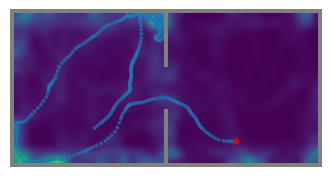

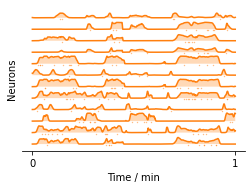

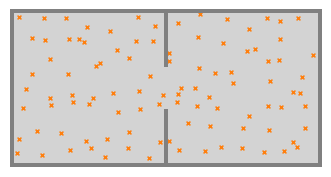

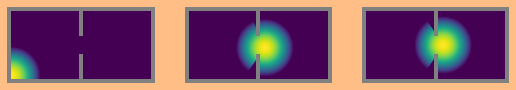

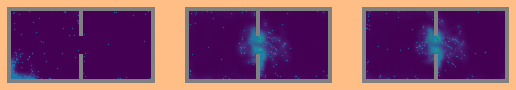

In [5]:
# 1 Initialise environment.
Env = Environment(
    params = {'aspect':2,
               'scale':1})

# 2 Add walls. 
Env.add_wall([[1,0],[1,0.35]])
Env.add_wall([[1,0.65],[1,1]])

# 3 Add Agent.
Ag = Agent(Env,
           params={'speed_mean':0.2})
Ag.pos = np.array([0.5,0.5])

# 4 Add place cells. 
PCs = PlaceCells(Ag,
                 params={'Agent':Ag,
                         'n':100,
                         'description':'gaussian_threshold',
                         'widths':0.40,
                         'wall_geometry':'line_of_sight',
                         'max_fr':5,
                         'min_fr':0.1})
PCs.place_cell_centres[99] = np.array([1.1,0.5])

# 5 Add boundary vector cells.
BVCs = BoundaryVectorCells(Ag,
                params = {'n':30,})

# 6 Simulate. 
dt = 10e-3 
T = 10*60
from tqdm import tqdm #gives time bar
for i in tqdm(range(int(T/dt))):
    Ag.update(dt=dt)
    PCs.update()
    BVCs.update()

# 7 Plot trajectory. 
fig, ax = Ag.plot_position_heatmap()
fig, ax = Ag.plot_trajectory(t_start=570,t_end=600,fig=fig,ax=ax)

# 8 Plot timeseries. 
BVCs.plot_rate_timeseries(t_start=0,t_end=60,chosen_neurons='12',plot_spikes=True)

# 9 Plot place cells. 
PCs.plot_place_cell_locations()
# 10 Plot rate maps. 
PCs.plot_rate_map(chosen_neurons='3',plot_spikes=False)
PCs.plot_rate_map(chosen_neurons='3',by_history=True,plot_spikes=True)
